In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
from pprint import pprint
from pybea.client import BureauEconomicAnalysisClient
import datapungibea as dpb
from datetime import datetime
#bls_key = 'a221097743424e50a9640418bcff10bb'

#initialize the new Client
#data =dpb.data('165CE351-F1E7-4289-966F-C6002ACBD851')


In [2]:
saemp69 = pd.read_csv('SAEMP25S__ALL_AREAS_1969_2001.csv')
saemp98 = pd.read_csv('SAEMP25N__ALL_AREAS_1998_2019.csv')

In [3]:
desc69 = saemp69['Description']
desc69 = desc69.astype(str)
desc98 = saemp98['Description']
desc98 = desc98.astype(str)

In [4]:
desc69 = pd.Series([x.strip() for x in desc69])
desc98 = pd.Series([x.strip() for x in desc98])

In [5]:
# desc69 = desc69.replace({'Heavy construction contractors':'Contractors',
#                         'Agricultural services':'Agricultural services, forestry, and fishing',
#                         'Forestry and fishing':'Agricultural services, forestry, and fishing',
#                         'Forestry':'Agricultural services, forestry, and fishing',
#                         'Fishing':'Agricultural services, forestry, and fishing',
#                         'Metal mining':'Mining',
#                         'Coal mining':'Mining',
#                         'Insurance agents, brokers, and services':'Business services',
#                         'Insurance carriers':'Business services',
#                         'Real estate':'Business services',
#                         'Finance, insurance, and real estate':'Business services',
#                         'Other finance, insurance, and real estate':'Business services',
#                         'Combined real estate, insurance, etc. 4/':'Business services',
#                         'Security and commodity brokers':'Business services',
#                         'Depository and nondepository institutions':'Business services',
#                         'Holding and other investment offices':'Business services',
#                         'Railroad transportation':'Transportation and public utilities',
#                         'Transportation by air':'Transportation and public utilities',
#                         'Water transportation': 'Transportation and public utilities',
#                         'Electric, gas, and sanitary services':'Transportation and public utilities',
#                         'Other transportation':'Transportation and public utilities',
#                         'General building contractors': 'Contractors',
#                         'Special trade contractors':'Contractors',
#                         'Miscellaneous manufacturing industries':'Miscellaneous manufacturing',
#                         'State and local':'Government and government enterprises',
#                         'State government':'Government and government enterprises',
#                         'Local government':'Government and government enterprises',
#                         'Personal services':'Services',
#                         'Miscellaneous services':'Services',
#                         'Social services 5/':'Services',
#                         'Food stores':'Retail trade',
#                         'Apparel and accessory stores':'Retail trade',
#                         'General merchandise stores':'Retail trade',
#                         'Home furniture and furnishings stores':'Retail trade',
#                         'Miscellaneous retail':'Retail trade'})

In [6]:
desc69 = desc69.replace({'Apparel and accessory stores':'Clothing and clothing accessories stores',
                        'Fishing':'Forestry, fishing, and related activities',
                        'Forestry':'Forestry, fishing, and related activities',
                        'Forestry and fishing':'Forestry, fishing, and related activities',
                        'Insurance carriers':'Insurance carriers and related activities',
                        'Transportation by air':'Air transportation',
                        'Rubber and miscellaneous plastics products':'Plastics and rubber products manufacturing',
                        'Food and kindred products':'Food manufacturing',
                        'Apparel and other textile products':'Apparel manufacturing',
                        'Amusement and recreation services':'Amusement, gambling, and recreation industries',
                        'Building materials and garden equipment':'Building material and garden equipment and supplies dealers',
                        'Motion pictures':'Motion picture and sound recording industries',
                        'Eating and drinking places':'Food services and drinking places',
                        'Special trade contractors':'Specialty trade contractors',
                        'Museums, botanical, zoological gardens':'Museums, historical sites, and similar institutions',
                        'Petroleum and coal products':'Petroleum and coal products manufacturing',
                        'Paper and allied products':'Paper manufacturing',
                        'Fabricated metal products':'Fabricated metal product manufacturing',
                        'Nonmetallic minerals, except fuels':'Nonmetallic mineral product manufacturing',
                        'Agricultural services':'Farm employment',
                        'Agricultural services, forestry, and fishing':'Forestry, fishing, and related activities',
                        'Automotive dealers and service stations':'Motor vehicle and parts dealers',
                        'Automotive repair, services, and parking':'Repair and maintenance',
                        'Business services':'Securities, commodity contracts, and other financial investments and related activities',
                        'Chemicals and allied products':'Chemical manufacturing',
                        'Coal mining':'Mining (except oil and gas)',
                        'Combined real estate, insurance, etc. 4/':'Real estate and rental and leasing',
                        'Communications':'Other information services 3/',
                        'Depository and nondepository institutions':'Funds, trusts, and other financial vehicles',
                        'Electric, gas, and sanitary services':'Utilities',
                        'Electronic and other electric equipment':'Electrical equipment, appliance, and component manufacturing',
                        'Engineering and management services 6/':'Professional, scientific, and technical services',
                        'Finance, insurance, and real estate':'Finance and insurance',
                        'Food stores':'Food and beverage stores',
                        'Furniture and fixtures':'Furniture and related product manufacturing',
                        'General building contractors':'Construction of buildings',
                        'Health services':'Ambulatory health care services',
                        'Heavy construction contractors':'Heavy and civil engineering construction',
                        'Holding and other investment offices':'Securities, commodity contracts, and other financial investments and related activities',
                        'Home furniture and furnishings stores':'Furniture and home furnishings stores',
                        'Hotels and other lodging places':'Accommodation',
                        'Industrial machinery and equipment':'Machinery manufacturing',
                        'Instruments and related products':'Miscellaneous manufacturing',
                        'Insurance agents, brokers, and services':'Insurance carriers and related activities',
                        'Leather and leather products':'Leather and allied product manufacturing',
                        'Legal services':'Professional, scientific, and technical services',
                        'Local and interurban passenger transit':'Transit and ground passenger transportation',
                        'Lumber and wood products':'Wood product manufacturing',
                        'Membership organizations':'Amusement, gambling, and recreation industries',
                        'Metal mining':'Mining (except oil and gas)',
                        'Mining':'Mining (except oil and gas)',
                        'Miscellaneous manufacturing industries':'Miscellaneous manufacturing',
                        'Miscellaneous manufacturing|':'Miscellaneous manufacturing',
                        'Miscellaneous repair services':'Repair and maintenance',
                        'Miscellaneous retail':'Miscellaneous store retailers',
                        'Miscellaneous services':'Miscellaneous store retailers',
                        'Motor vehicles and equipment':'Motor vehicle and parts dealers',
                        'Ordnance 3/':'Local government',
                        'Other finance, insurance, and real estate':'Finance and insurance',
                        'Other transportation':'Support activities for transportation',
                        'Other transportation equipment':'Other transportation equipment manufacturing',
                        'Personal services':'Personal and laundry services',
                        'Pipelines, except natural gas':'Pipeline transportation',
                        'Primary metal industries':'Primary metal manufacturing',
                        'Printing and publishing':'Printing and related support activities',
                        'Railroad transportation':'Rail transportation',
                        'Security and commodity brokers':'Securities, commodity contracts, and other financial investments and related activities',
                        'Services':'Other services (except government and government enterprises)',
                        'Social services 5/':'Social assistance',
                        'Stone, clay, and glass products':'Nonmetallic mineral product manufacturing',
                        'Textile mill products':'Textile product mills',
                        'Textile product mills #  Textile mills':'Textile product mills',
                        'Tobacco products':'Beverage and tobacco product manufacturing',
                        'Transportation':'Support activities for transportation',
                        'Transportation and public utilities':'Pipeline transportation',
                        'Transportation services':'Support activities for transportation',
                        'Trucking and warehousing':'Transportation and warehousing'})

81

In [9]:
list_98 = set(desc98.to_list())
list_69 = set(desc69.to_list())

In [10]:
diff = []
same = []
for cat in list_69:
    if cat not in list_98:
        diff.append(cat)
    else:
        same.append(cat)

In [262]:
saemp69_c = saemp69.copy().copy()
saemp98_c = saemp98.copy().copy()

In [263]:
saemp69_c['Description']=saemp69_c['Description'].str.strip()
saemp98_c['Description'] = saemp98_c['Description'].str.strip()

In [264]:
saemp69_c = saemp69_c.replace({'Description':{'Apparel and accessory stores':'Clothing and clothing accessories stores',
                        'Fishing':'Forestry, fishing, and related activities',
                        'Forestry':'Forestry, fishing, and related activities',
                        'Forestry and fishing':'Forestry, fishing, and related activities',
                        'Insurance carriers':'Insurance carriers and related activities',
                        'Transportation by air':'Air transportation',
                        'Rubber and miscellaneous plastics products':'Plastics and rubber products manufacturing',
                        'Food and kindred products':'Food manufacturing',
                        'Apparel and other textile products':'Apparel manufacturing',
                        'Amusement and recreation services':'Amusement, gambling, and recreation industries',
                        'Building materials and garden equipment':'Building material and garden equipment and supplies dealers',
                        'Motion pictures':'Motion picture and sound recording industries',
                        'Eating and drinking places':'Food services and drinking places',
                        'Special trade contractors':'Specialty trade contractors',
                        'Museums, botanical, zoological gardens':'Museums, historical sites, and similar institutions',
                        'Petroleum and coal products':'Petroleum and coal products manufacturing',
                        'Paper and allied products':'Paper manufacturing',
                        'Fabricated metal products':'Fabricated metal product manufacturing',
                        'Nonmetallic minerals, except fuels':'Nonmetallic mineral product manufacturing',
                        'Agricultural services':'Farm employment',
                        'Agricultural services, forestry, and fishing':'Forestry, fishing, and related activities',
                        'Automotive dealers and service stations':'Motor vehicle and parts dealers',
                        'Automotive repair, services, and parking':'Repair and maintenance',
                        'Business services':'Securities, commodity contracts, and other financial investments and related activities',
                        'Chemicals and allied products':'Chemical manufacturing',
                        'Coal mining':'Mining (except oil and gas)',
                        'Combined real estate, insurance, etc. 4/':'Real estate and rental and leasing',
                        'Communications':'Other information services 3/',
                        'Depository and nondepository institutions':'Funds, trusts, and other financial vehicles',
                        'Electric, gas, and sanitary services':'Utilities',
                        'Electronic and other electric equipment':'Electrical equipment, appliance, and component manufacturing',
                        'Engineering and management services 6/':'Professional, scientific, and technical services',
                        'Finance, insurance, and real estate':'Finance and insurance',
                        'Food stores':'Food and beverage stores',
                        'Furniture and fixtures':'Furniture and related product manufacturing',
                        'General building contractors':'Construction of buildings',
                        'Health services':'Ambulatory health care services',
                        'Heavy construction contractors':'Heavy and civil engineering construction',
                        'Holding and other investment offices':'Securities, commodity contracts, and other financial investments and related activities',
                        'Home furniture and furnishings stores':'Furniture and home furnishings stores',
                        'Hotels and other lodging places':'Accommodation',
                        'Industrial machinery and equipment':'Machinery manufacturing',
                        'Instruments and related products':'Miscellaneous manufacturing',
                        'Insurance agents, brokers, and services':'Insurance carriers and related activities',
                        'Leather and leather products':'Leather and allied product manufacturing',
                        'Legal services':'Professional, scientific, and technical services',
                        'Local and interurban passenger transit':'Transit and ground passenger transportation',
                        'Lumber and wood products':'Wood product manufacturing',
                        'Membership organizations':'Amusement, gambling, and recreation industries',
                        'Metal mining':'Mining (except oil and gas)',
                        'Mining':'Mining (except oil and gas)',
                        'Miscellaneous manufacturing industries':'Miscellaneous manufacturing',
                        'Miscellaneous manufacturing|':'Miscellaneous manufacturing',
                        'Miscellaneous repair services':'Repair and maintenance',
                        'Miscellaneous retail':'Miscellaneous store retailers',
                        'Miscellaneous services':'Miscellaneous store retailers',
                        'Motor vehicles and equipment':'Motor vehicle and parts dealers',
                        'Ordnance 3/':'Local government',
                        'Other finance, insurance, and real estate':'Finance and insurance',
                        'Other transportation':'Support activities for transportation',
                        'Other transportation equipment':'Other transportation equipment manufacturing',
                        'Personal services':'Personal and laundry services',
                        'Pipelines, except natural gas':'Pipeline transportation',
                        'Primary metal industries':'Primary metal manufacturing',
                        'Printing and publishing':'Printing and related support activities',
                        'Railroad transportation':'Rail transportation',
                        'Security and commodity brokers':'Securities, commodity contracts, and other financial investments and related activities',
                        'Services':'Other services (except government and government enterprises)',
                        'Social services 5/':'Social assistance',
                        'Stone, clay, and glass products':'Nonmetallic mineral product manufacturing',
                        'Textile mill products':'Textile product mills',
                        'Textile product mills #  Textile mills':'Textile product mills',
                        'Tobacco products':'Beverage and tobacco product manufacturing',
                        'Transportation':'Support activities for transportation',
                        'Transportation and public utilities':'Pipeline transportation',
                        'Transportation services':'Support activities for transportation',
                        'Trucking and warehousing':'Transportation and warehousing'}})

In [265]:
saemp98_c = saemp98_c.drop(['1998','1999','2000','2001','TableName'],axis = 1)
saemp69_c = saemp69_c.drop('TableName',axis = 1)
saemp69_c=saemp69_c.astype(object)
saemp98_c=saemp98_c.astype(object)

In [266]:
full_merged = pd.merge(saemp69_c.dropna(),saemp98_c.dropna(),how = 'outer',on =['GeoFIPS', 'GeoName', 'Region', 'LineCode', 'IndustryClassification', 'Description','Unit'])

In [267]:
full_merged_1 = full_merged.copy()

In [268]:
full_merged_1 = full_merged_1.replace({'Description': {'Accommodation':'Accommodation and food services',
                                                  'Construction of buildings':'Construction',
                                                  'Forestry and logging':'Forestry, fishing, and related activities',
                                                      'Fishing, hunting and trapping':'Forestry, fishing, and related activities',
                                                      'Mining (except oil and gas)':'Mining, quarrying, and oil and gas extraction',
                                                      'Administrative and support services':'Administrative and support and waste management and remediation services',
                                                       'Waste management and remediation services':'Administrative and support and waste management and remediation services',
                                                      'Amusement, gambling, and recreation industries':'Arts, entertainment, and recreation',
                                                      'Performing arts, spectator sports, and related industries':'Arts, entertainment, and recreation'}})

In [340]:
#maybe build function for anystate
Alabama_Ex = full_merged_1[(full_merged_1['GeoName'] == 'Alabama')]
California_ex = full_merged_1[full_merged_1['GeoName'] == 'California']
NewYork_ex = full_merged_1[full_merged_1['GeoName'] == 'New York']

In [341]:
cali_tot_emp = pd.DataFrame(California_ex[California_ex['Description'] == 'Total employment (number of jobs)'][['1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].astype(int).stack().reset_index()[['level_1',0]])
cali_tot_emp = cali_tot_emp.rename(columns = {'level_1': 'Years', 0:'Job Number'}).set_index('Years')
#cali_tot_emp = cali_tot_emp.index.astype(datetime)

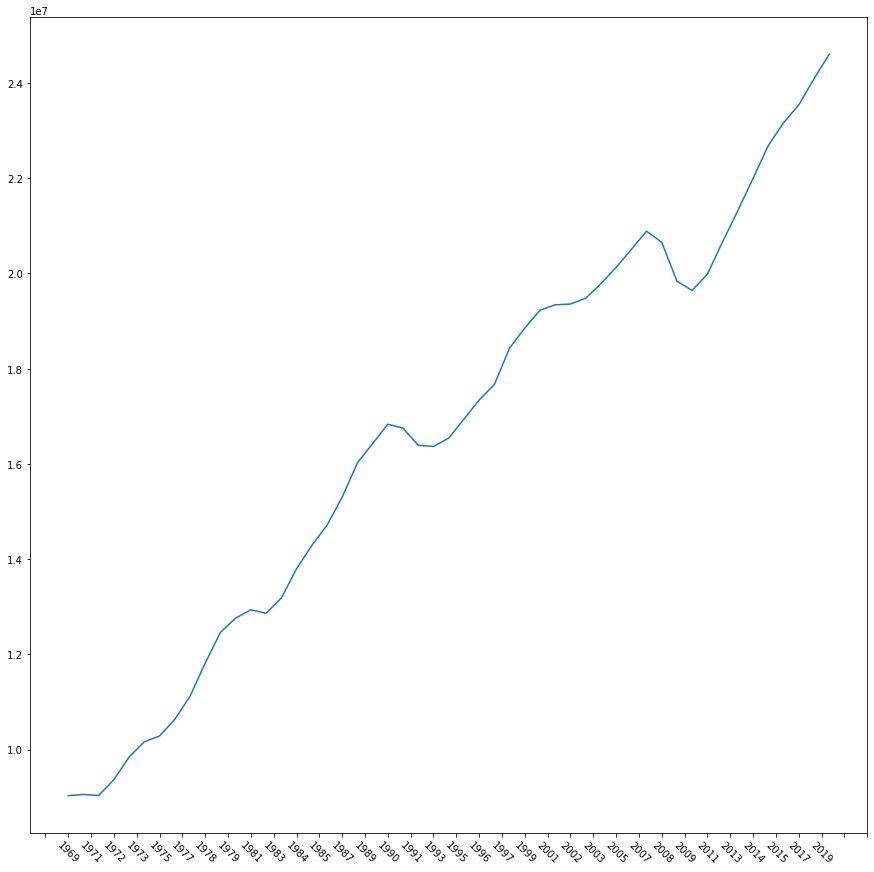

In [356]:
fig, ax = plt.subplots(figsize = (15,15))
ax.plot(cali_tot_emp.index,cali_tot_emp['Job Number'])
ax.tick_params(axis = 'x',labelrotation=-45)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

